In [3]:

import pymysql
#连接数据库
db = pymysql.connect(host="rm-uf6ua72q394fq6v9q9o.mysql.rds.aliyuncs.com",port=3306,user="data_analyse",password="et_data_analyse",database="ccnu_main_test",charset="utf8")
#使用cursor()方法创建一个游标对象
cursor = db.cursor()
#cursor=pymysql.cursors.DictCursor

sql1='''
select count(*) as number_nine
from et_activity
where date(enroll_start_time) between '2019-09-01' and '2019-09-30';
'''
#使用execute()方法执行SQL语句
cursor.execute(sql1)
data_nine = cursor.fetchall()
print(data_nine)
db.rollback()

sql2='''
select count(*) as number_ten
from et_activity
where date(enroll_start_time) between '2019-10-01' and '2019-10-31';
'''
#使用execute()方法执行SQL语句
cursor.execute(sql2)
data_ten = cursor.fetchall()
print(data_ten)
db.rollback()

sql3='''
select count(*) as number_eleven
from et_activity
where date(enroll_start_time) between '2019-11-01' and '2019-11-30';
'''
#使用execute()方法执行SQL语句
cursor.execute(sql3)
data_eleven = cursor.fetchall()
print(data_eleven)
db.rollback()

#关闭游标和数据库的连接
cursor.close()
db.close()



((8,),)
((30,),)
((27,),)


<BarContainer object of 3 artists>

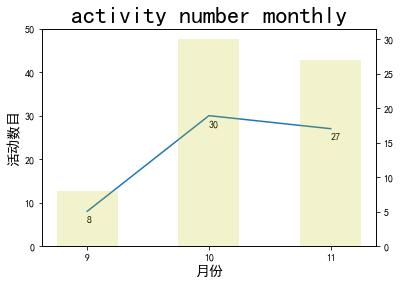

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#折线图和柱形图

activity_number=[]
#活动数目列表
activity_number.append(data_nine[0][0])
activity_number.append(data_ten[0][0])
activity_number.append(data_eleven[0][0])
activity_month=['9','10','11']

plt.title("activity number monthly",fontsize=24)
plt.xlabel("月份",fontsize=14)#设置轴的名称
plt.ylabel("活动数目",fontsize=14)
plt.ylim(0,50)#设置y值界限

#text()添加数据标签
for x,y in zip(activity_month,activity_number):
    plt.text(x,y-2.5,'%.0f'%y)
plt.plot(activity_month,activity_number)

#绘制柱形图
plt2 = plt.twinx()  # 组合图
plt2.bar(activity_month,activity_number , alpha=0.2, width=0.5,color='y')